# Trabajo Final Big Data
Elaborado por Matthew Fehr

## Componente 1: Data Fetching
Las redes sociales son una fuente masiva de información que puede ser muy útil para las
empresas, en particular para el afán de mejorar las interacciones con clientes actuales y
potenciales o para evaluar la imagen de la marca. Por este motivo, resultan un ejemplo claro de
big data con aplicabilidad directa al mundo empresarial.
Como paso inicial del proyecto de big data, el alumno escribir un script que permita obtener una
lista de las últimas menciones de un handle o hashtag en Twitter a través de su API. Este
programa en Python deberá luego guardar los tweets en un archivo .csv para su posterior
análisis.
El archivo de salida deberá contener mínimamente:
* Texto del tweet
* Autor
* Timestamp
* Número de Favs
* Número de RTs

### Importar las librerias necesarias

In [2]:
#importamos librerias
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Preparar el API de Twitter con los datos de autenticación

In [3]:
#Buscar las llaves de autenticación de Twitter API en un archivo .csv en el entorno local
log = pd.read_csv("twitter_api_log.csv", sep=',')

In [ ]:
## Upload to Drive
##Descomentar en caso de usar Google Colab
#import io
#from google.colab import files
#uploaded = files.upload()

In [ ]:
##Parte 2 del Google Colab: para convertir a dataframe el archivo que subimos a memoria
#log = pd.read_csv(io.BytesIO(uploaded['analisis.csv']))    #descomentar

In [4]:
#Revisar los datos
log.head()

,key,value
0,API Key,e27sd02R39EIsSHfrTUCiOwXT
1,API Key Secret,X0K7qJC7lZ9An1NXWJ3yYijOp4tAFPWcd3OjcBP15djPe9...
2,Access Token,175984347-MCv5cbRKRBxXOFKDUfsQVtGhuPy42aRDn53U...
3,Access Token Secret,XMEe25XGwoeozruLf9Y1zK5wYlTup9U0xLHLG4BT3JffE


In [5]:
# Asignar los Twitter Api Credentials del CSV a variables
consumerKey = log["value"][0]
consumerSecret = log["value"][1]
accessToken = log["value"][2]
accessTokenSecret = log["value"][3]

In [6]:
#creamos un objeto de autenticacion
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Seteamos el access token y access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 

#Creamos el objeto API mientras parseamos la informacion en auth  
api = tweepy.API(authenticate, wait_on_rate_limit = True)

### Extraer los tweets deseados de Twitter

In [7]:
# Extraemos los 300 tweets mas recientes de #Tesla
tweets_list = api.search_tweets(q="#Tesla", tweet_mode='extended', lang='en', result_type='recent', count=300)

#  Imprimimos los 5 ultimos tweets
print("Los 5 tweets más recientes:\n")
i=1
for tweet in tweets_list[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Los 5 tweets más recientes:

1) Good morning. Makes my day to see a #Tesla first thing. #Tokyo #Japan #東京 #日本 https://t.co/uzzKTfI3kj

2) #Tesla #TSLA #TechnicalIndicator Market Types (MT) 
-0.9982 | Extreme Fear 

View interactive details: 
https://t.co/TYaiR9u6EX 

@ioBotsPro @ReiSoleil https://t.co/nSgrCKA5U6

3) $TSLA winnings of initial #BTC investment🙌

$-559112143 (-41.42 %) (Realized: 272 M)
(Estimating an average buy price of $35000/BTC with now 38,700 BTC holdings $BTCUSD)
#Tesla #Bitcoin #crypto

4) @itskyleconner @BjornNyland This has happened **Never** at each and every #Tesla supercharger for all my road trips since 2018.  I've seen a few examples in the news of vandalized and cut cords but that isn't Tesla's fault.

5) RT @TeslaDiva99: So let’s talk Charging for our Great American Adventure 🇺🇸 if we would have taken my husband’s vehicle it would of cost be…



In [8]:
# Funcion para sacar la informacion deseada del JSON en un formato limpio
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    name_author = tweet.user.name
    tag_author = '@'+tweet.user.screen_name
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'tweet'            :text, 
            'name_author'      :name_author, 
            'user_tag'         :tag_author, 
            'favourite_count'  :favourite_count, 
            'retweet_count'    :retweet_count, 
            'created_at'       :created_at}
            
    output.append(line)

In [9]:
#Convertir la informacion sacada en un DataFrame y guardarlo como un .csv
data = pd.DataFrame(output)
data.to_csv('tweets_crudos.csv')

### Importamos de nuevo el CSV recién creado para verificar el contenido

In [ ]:
## Upload to Drive
##Descomentar en caso de usar Google Colab
#import io
#from google.colab import files
#uploaded = files.upload()

In [ ]:
##Parte 2 del Google Colab: para convertir a dataframe el archivo que subimos a memoria
#log = pd.read_csv(io.BytesIO(uploaded['analisis.csv']))    #descomentar

In [64]:
#Buscamos el .csv del entorno local y dejamos la primera columna de indice
data = pd.read_csv("tweets_crudos.csv", sep=',').drop(columns='Unnamed: 0')

In [31]:
data

,tweet,name_author,user_tag,favourite_count,retweet_count,created_at
0,Good morning. Makes my day to see a #Tesla fir...,Terry Cormier,@DCStars,0,0,2022-06-21 02:33:16+00:00
1,#Tesla #TSLA #TechnicalIndicator Market Types ...,ioBots Alerts,@IOB_llc,0,0,2022-06-21 02:30:11+00:00
2,$TSLA winnings of initial #BTC investment🙌\n\n...,MBrae,@MBrae3,0,0,2022-06-21 02:30:05+00:00
3,@itskyleconner @BjornNyland This has happened ...,Lawrence 4.68e+3 🔋,@Avatrode,1,0,2022-06-21 02:26:28+00:00
4,RT @TeslaDiva99: So let’s talk Charging for ou...,The Mortika Lacrosse (Kai),@mortikalacrosse,0,2,2022-06-21 02:24:29+00:00
...,...,...,...,...,...,...
95,Coolio! JamesSpanko just spotted a 2018 Tesla ...,TeslaRadar Bot,@TeslaradarB,1,0,2022-06-21 01:12:15+00:00
96,Well done! JamesSpanko nailed it by spotting a...,TeslaRadar Bot,@TeslaradarB,1,0,2022-06-21 01:12:14+00:00
97,Fresh! JamesSpanko just spotted a 2020 Tesla M...,TeslaRadar Bot,@TeslaradarB,1,0,2022-06-21 01:12:14+00:00
98,Nice! JamesSpanko just spotted a 2021 Tesla Mo...,TeslaRadar Bot,@TeslaradarB,1,0,2022-06-21 01:12:14+00:00


## Componente 2: Data Analysis
La siguiente fase del trabajo práctico final de big data consiste en analizar los tweets
descargados como parte del componente 1. Para ello, se hará uso de los conocimientos
adquiridos sobre scraping y data mining en python, además de herramientas de análisis de
sentimiento en la nube.
El alumno deberá crear un script en Python que calcule el sentimiento de cada tweet y
almacene los resultados en un archivo .csv. Además, se deberá calcular el sentimiento
promedio relacionado a las menciones.
Tanto como en el código fuente como en el README se debe aclarar qué algoritmo de Analisis
de sentimientos se utilizó, y por qué. Además de explicar los pasos del preprocesamiento
realizado a la base.
Como entregable de este componente se espera un repositorio github con:
* Código fuente
* README.md con instrucciones de instalación y uso del script
* Dataset en formato .csv

### Paso 1: Limpieza de datos

In [44]:
#creamos la funcion para limpiar los tweets

def cleanTxt(text):
    text = re.sub('https?:\/\/\S+', '', text)  # Sacando los hipervinculos
    text = re.sub('_', '', text)               # Sacando los '_'
    text = re.sub('RT[\s]+', '', text)         # Sacando los RT retweets
    text = re.sub('@[A-Za-z0-99]+', '', text)  # Sacando las '@' menciones
    text = re.sub("[%#:.,;!?’*$()-]", '', text)      # Sacando los '#' ':' ',' ';'
    text = re.sub('[0-9]', '', text)           # Sacando los números
    text = re.sub('\n', ' ', text)             # Sacando los '\n' enters
    text = text.lower()
 
    return text


In [65]:
# Limpiar la columna deseada, en este caso la columna 'tweet' del csv que importamos al final del componente anterior
data['tweet'] = data['tweet'].apply(cleanTxt)

# Mostrar el DataFrame limpiado
data

,tweet,name_author,user_tag,favourite_count,retweet_count,created_at
0,good morning makes my day to see a tesla first...,Terry Cormier,@DCStars,0,0,2022-06-21 02:33:16+00:00
1,tesla tsla technicalindicator market types mt ...,ioBots Alerts,@IOB_llc,0,0,2022-06-21 02:30:11+00:00
2,tsla winnings of initial btc investment🙌 r...,MBrae,@MBrae3,0,0,2022-06-21 02:30:05+00:00
3,this has happened never at each and every te...,Lawrence 4.68e+3 🔋,@Avatrode,1,0,2022-06-21 02:26:28+00:00
4,so lets talk charging for our great american ...,The Mortika Lacrosse (Kai),@mortikalacrosse,0,2,2022-06-21 02:24:29+00:00
...,...,...,...,...,...,...
95,coolio jamesspanko just spotted a tesla model...,TeslaRadar Bot,@TeslaradarB,1,0,2022-06-21 01:12:15+00:00
96,well done jamesspanko nailed it by spotting a ...,TeslaRadar Bot,@TeslaradarB,1,0,2022-06-21 01:12:14+00:00
97,fresh jamesspanko just spotted a tesla model ...,TeslaRadar Bot,@TeslaradarB,1,0,2022-06-21 01:12:14+00:00
98,nice jamesspanko just spotted a tesla model ...,TeslaRadar Bot,@TeslaradarB,1,0,2022-06-21 01:12:14+00:00


### Pasos 2-4: Tokenización, POS tagging, saqueo de los stopwords

In [ ]:
#importación de librerias necesarias
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

In [14]:
# Preparar el diccionario de POS tagger
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

In [15]:
#función de tokenizar las palabras y sacar los stopwords del lenguaje indicado
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [46]:
#aplicar la función recién creada a la columna de tweet, creando una nueva columna con los resultados
data['POS tagged'] = data['tweet'].apply(token_stop_pos)
data.head()

,tweet,name_author,user_tag,favourite_count,retweet_count,created_at,POS tagged
0,good morning makes my day to see a tesla first...,Terry Cormier,@DCStars,0,0,2022-06-21 02:33:16+00:00,"[(good, a), (morning, n), (makes, v), (day, n)..."
1,tesla tsla technicalindicator market types mt ...,ioBots Alerts,@IOB_llc,0,0,2022-06-21 02:30:11+00:00,"[(tesla, n), (tsla, n), (technicalindicator, v..."
2,tsla winnings of initial btc investment🙌 r...,MBrae,@MBrae3,0,0,2022-06-21 02:30:05+00:00,"[(tsla, a), (winnings, n), (initial, a), (btc,..."
3,this has happened never at each and every te...,Lawrence 4.68e+3 🔋,@Avatrode,1,0,2022-06-21 02:26:28+00:00,"[(happened, v), (never, r), (every, None), (te..."
4,so lets talk charging for our great american ...,The Mortika Lacrosse (Kai),@mortikalacrosse,0,2,2022-06-21 02:24:29+00:00,"[(lets, a), (talk, n), (charging, v), (great, ..."


### Paso 5: Obtener las palabras stem

#### Lemmatización

In [47]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# definir la función de lemmatización
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [48]:
#aplicar la función de lemmatización
data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,tweet,name_author,user_tag,favourite_count,retweet_count,created_at,POS tagged,Lemma
0,good morning makes my day to see a tesla first...,Terry Cormier,@DCStars,0,0,2022-06-21 02:33:16+00:00,"[(good, a), (morning, n), (makes, v), (day, n)...",good morning make day see tesla first thing ...
1,tesla tsla technicalindicator market types mt ...,ioBots Alerts,@IOB_llc,0,0,2022-06-21 02:30:11+00:00,"[(tesla, n), (tsla, n), (technicalindicator, v...",tesla tsla technicalindicator market type mt...
2,tsla winnings of initial btc investment🙌 r...,MBrae,@MBrae3,0,0,2022-06-21 02:30:05+00:00,"[(tsla, a), (winnings, n), (initial, a), (btc,...",tsla winning initial btc investment🙌 realize...
3,this has happened never at each and every te...,Lawrence 4.68e+3 🔋,@Avatrode,1,0,2022-06-21 02:26:28+00:00,"[(happened, v), (never, r), (every, None), (te...",happen never every tesla supercharger road t...
4,so lets talk charging for our great american ...,The Mortika Lacrosse (Kai),@mortikalacrosse,0,2,2022-06-21 02:24:29+00:00,"[(lets, a), (talk, n), (charging, v), (great, ...",lets talk charge great american adventure 🇺🇸...


In [49]:
data[['tweet', 'Lemma']]

,tweet,Lemma
0,good morning makes my day to see a tesla first...,good morning make day see tesla first thing ...
1,tesla tsla technicalindicator market types mt ...,tesla tsla technicalindicator market type mt...
2,tsla winnings of initial btc investment🙌 r...,tsla winning initial btc investment🙌 realize...
3,this has happened never at each and every te...,happen never every tesla supercharger road t...
4,so lets talk charging for our great american ...,lets talk charge great american adventure 🇺🇸...
...,...,...
95,coolio jamesspanko just spotted a tesla model...,coolio jamesspanko spot tesla model 🇺🇸 stand...
96,well done jamesspanko nailed it by spotting a ...,well do jamesspanko nail spot tesla model 🇺🇸...
97,fresh jamesspanko just spotted a tesla model ...,fresh jamesspanko spot tesla model 🇺🇸 dual m...
98,nice jamesspanko just spotted a tesla model ...,nice jamesspanko spot tesla model 🇺🇸 standar...


### Sentiment analysis using VADER
VADER (Valence Aware Dictionary and sEntiment Reasoner) es una herramienta de análisis de sentimientos basada en reglas y léxico que está específicamente en sintonía con los sentimientos expresados en las redes sociales.
Se utiliza para el análisis de sentimientos de texto que tiene ambas polaridades, es decir, positivo/negativo. VADER se utiliza para cuantificar la cantidad de emoticons positiva o negativa que tiene el texto y también la intensidad de los emoticons.
Y elegí este tipo de análisis ya que funciona bastante bien con las redes sociales ya que puede interpretar muy bien los textos conteniendo emoticons, slangs, conjunciones, palabras mayúsculas, puntuaciones y mucho mas.

In [50]:
#importar la librería
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [51]:
#Definición de un dataframe en donde se va trabajar
fin_data = pd.DataFrame(data[['tweet', 'Lemma']])

In [52]:
analyzer = SentimentIntensityAnalyzer()

# función que calcula el sentimento VADER  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

In [58]:
#aplicar la función de análisis VADER a lemma
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
fin_data.head()

,tweet,Lemma,Vader Sentiment
0,good morning makes my day to see a tesla first...,good morning make day see tesla first thing ...,0.4404
1,tesla tsla technicalindicator market types mt ...,tesla tsla technicalindicator market type mt...,-0.5413
2,tsla winnings of initial btc investment🙌 r...,tsla winning initial btc investment🙌 realize...,0.5267
3,this has happened never at each and every te...,happen never every tesla supercharger road t...,0.0408
4,so lets talk charging for our great american ...,lets talk charge great american adventure 🇺🇸...,0.7506


In [59]:
# función de categorizar los resultados 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [60]:
#aplicar la función de categorización
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,tweet,Lemma,Vader Sentiment,Vader Analysis
0,good morning makes my day to see a tesla first...,good morning make day see tesla first thing ...,0.4404,Neutral
1,tesla tsla technicalindicator market types mt ...,tesla tsla technicalindicator market type mt...,-0.5413,Negative
2,tsla winnings of initial btc investment🙌 r...,tsla winning initial btc investment🙌 realize...,0.5267,Positive
3,this has happened never at each and every te...,happen never every tesla supercharger road t...,0.0408,Neutral
4,so lets talk charging for our great american ...,lets talk charge great american adventure 🇺🇸...,0.7506,Positive


In [61]:
#Contar la cantidad de cada categoría
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     61
Positive    30
Negative     9
Name: Vader Analysis, dtype: int64

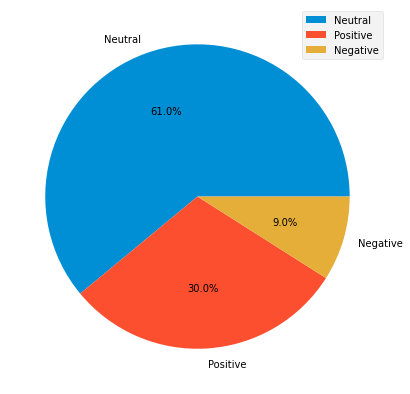

In [62]:
#Demostrar gráficamente los resultados
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, autopct='%1.1f%%', shadow=False)
plt.legend()

In [66]:
#Exportación de datos
fin_data.to_csv('tweets_analizados.csv')

### Resultados

En el análisis VADER vemos que los resultados de este Dataset específico es mayormente neutral (60%), pero también bastante positvo (30%) y un 9% negetivo en el momento de realizar esta extracción.